<a id="1"></a>
<div style="padding:20px;color:white;margin:0;font-size:40px;font-family:verdana;text-align:center;display:fill;border-radius:40px;background-color:#FFD700;overflow:hidden"><b>Book Recommendation System </b><a href="#top" role="button" aria-pressed="true" ></a>
</div>

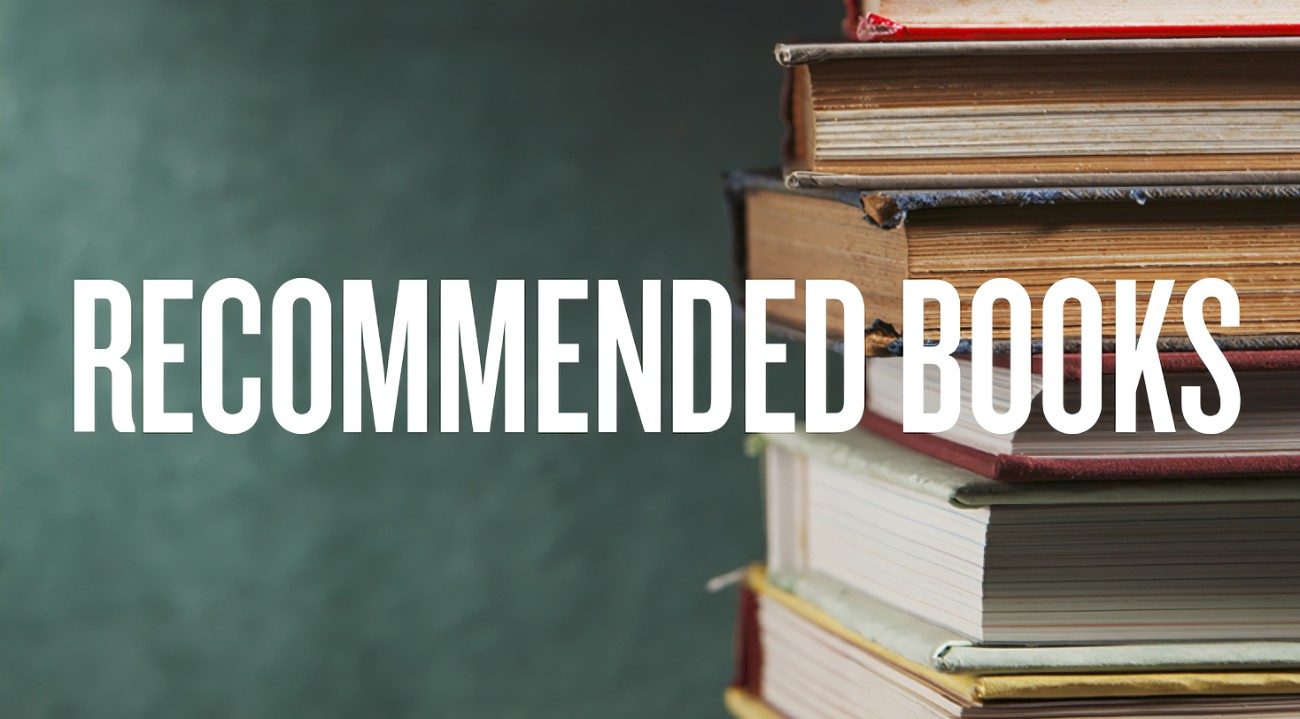

* I have basically created the book recommendation system for my project.
* As it will provide the 5 similar books related to the input provided by the user.
* For this project I have used the cosine similarity

<a id="1.1"></a>
<h2 style="font-family: Verdana; font-size: 25px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #E9967A; background-color: #ffffff;">1.1 What is Recommendation System
<a href="#top" role="button" aria-pressed="true" ></a>

- It basically helps in giving the suggestions according to the user preferance.


<a id="1.2"></a>
<h2 style="font-family: Verdana; font-size: 25px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #E9967A; background-color: #ffffff;">1.2 Benefits of the Recommendation System
<a href="#top" role="button" aria-pressed="true" ></a>

#### 1. Increased sales
* There are very few ways to achieve increased sales and a recommendation system is one of them. Once you set up an automated recommendation system, you get recurring additional sales and increases the profit

#### 2. Increased user satisfaction
* With the help of recommendation system, customer's satisfaction increases 

#### 3. Increased loyalty
* By getting customers to spend more on your website, you can increase their familiarity with your brand and user interface, increasing their probability of making future purchases from you.

#### 4. Reduced churn
* Recommendation system-powered emails are one of the best ways to re-engage customers. Discounts or coupons are other effective yet costly ways of re-engaging customers

<a id="1.3"></a>
<h2 style="font-family: Verdana; font-size: 25px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #E9967A; background-color: #ffffff;">1.3 Types of Recommendation System
<a href="#top" role="button" aria-pressed="true" ></a>

1. Popularity based
2. Content based
3. Collaborative Filtering
4. Hybrid Recommender System

**I have used the dataset from the Kaggle**

In [1]:
#importing the libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
os.chdir(r"C:\Users\riama\Desktop\Book_data")

In [3]:
books=pd.read_csv("Books (2).csv")
ratings=pd.read_csv("Ratings.csv")
users= pd.read_csv("Users.csv")

C:\Users\riama\AppData\Local\Temp\ipykernel_4244\3213055161.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books=pd.read_csv("Books (2).csv")


In [4]:
#checking book data

In [5]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [6]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [7]:
books.shape

(271360, 8)

In [8]:
#there are 271360 rows and 8 columns in which each of the column are object

In [9]:
#checking users data

In [10]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [11]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [12]:
users.shape

(278858, 3)

In [13]:
#As I can check that there are missing values in the column age using head itself
#But will check the missing values later when we will do the univariate analysis
#As I can check that in users data there are 3 column with one object column and two integers and there are 278858 rows.

In [14]:
#checking the ratings data


In [15]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [16]:
ratings.shape

(1149780, 3)

In [17]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


As I can check that there are book-rating and user-id in this data as we need the ratings to create the book recommendation system and as I can check that there are 3 columns with one object column and two numeric values and there are 1149780 rows.

### UNIVARIATE ANALYSIS & PRE-PROCESSING

In [18]:
# Now we will do some of the analysis like univariate analysis
def univar(data,y):
    unique_count= data[y].nunique()
    missing= data[y].isnull().sum()
    unique_cat= list(data[y].unique())
    f1=pd.DataFrame(data[y].value_counts(dropna=False))
    f1.rename(columns={y:"Count"},inplace=True)
    f2=pd.DataFrame(data[y].value_counts(normalize=True))
    f2.rename(columns={y:"percentage"},inplace=True)
    f2["percentage"]=round(f2["percentage"]*100,2)  
    ff=pd.concat([f1,f2],axis=1)
    
    myvalue= {"missing":missing,"unique category": unique_cat,"unique_count":unique_count}
    print(f"value count and %\n",ff)
    #sns.countplot(data=data,x=y)
    return myvalue

In [19]:
def univar_num(y):
    missing= y.isnull().sum()
    min1=round(y.min(),2)
    max1=round(y.max(),2)
    mean=round(y.mean(),2)
    var=round(y.var(),2)
    std=round(y.std(),2)
    range1=round(max1-min1,2)
    q1= round(y.quantile(.25),2)
    q2=round(y.quantile(.5),2)
    q3=round(y.quantile(.75),2)
    skew=round(y.skew(),2)
    kurt=round(y.kurt(),2)
    myval={"Missing Value":missing,"Minimum value": min1,"Maximum value": max1, "Mean value": mean,"Variance": var,"Standard Deviation": std,"Range": range1,
          "Quantile1":q1,"Quantile2": q2,"Quantile3":q3,"Skewness": skew,"kurtosis":kurt}
#     sns.histplot(y)
#     plt.show()
#     sns.boxplot(data=taxi_data,y=y)
#     plt.show()
    return myval

In [20]:
#first I am doing univariate analysis for the books dataset

In [21]:
books.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [22]:
univar(books,"ISBN")

value count and %
             Count  percentage
0195153448      1         0.0
0746008481      1         0.0
0395219906      1         0.0
043916169X      1         0.0
0879235322      1         0.0
...           ...         ...
1568303823      1         0.0
0525947612      1         0.0
207036819X      1         0.0
2877306127      1         0.0
0767409752      1         0.0

[271360 rows x 2 columns]


{'missing': 0,
 'unique category': ['0195153448',
  '0002005018',
  '0060973129',
  '0374157065',
  '0393045218',
  '0399135782',
  '0425176428',
  '0671870432',
  '0679425608',
  '074322678X',
  '0771074670',
  '080652121X',
  '0887841740',
  '1552041778',
  '1558746218',
  '1567407781',
  '1575663937',
  '1881320189',
  '0440234743',
  '0452264464',
  '0609804618',
  '1841721522',
  '1879384493',
  '0061076031',
  '0439095026',
  '0689821166',
  '0971880107',
  '0345402871',
  '0345417623',
  '0684823802',
  '0375759778',
  '0425163091',
  '3404921038',
  '3442353866',
  '3442410665',
  '3442446937',
  '0375406328',
  '0446310786',
  '0449005615',
  '0060168013',
  '038078243X',
  '055321215X',
  '067176537X',
  '0061099686',
  '0553582909',
  '0671888587',
  '0553582747',
  '0425182908',
  '042518630X',
  '0440223571',
  '0812523873',
  '0842342702',
  '0440225701',
  '0060914068',
  '0156047624',
  '0245542957',
  '0380715899',
  '0553280333',
  '0961769947',
  '0964778319',
  '067

In [23]:
univar(books,"Book-Title")

value count and %
                                                     Count  percentage
Selected Poems                                         27        0.01
Little Women                                           24        0.01
Wuthering Heights                                      21        0.01
The Secret Garden                                      20        0.01
Dracula                                                20        0.01
...                                                   ...         ...
What Every Kid Should Know                              1        0.00
The Seventh Enemy (A Brady Coyne Mystery)               1        0.00
A Brace of Skeet                                        1        0.00
The Yellow Admiral (O'Brian, Patrick, Aubrey/Ma...      1        0.00
A Guided Tour of Rene Descartes' Meditations on...      1        0.00

[242135 rows x 2 columns]


{'missing': 0,
 'unique category': ['Classical Mythology',
  'Clara Callan',
  'Decision in Normandy',
  'Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It',
  'The Mummies of Urumchi',
  "The Kitchen God's Wife",
  "What If?: The World's Foremost Military Historians Imagine What Might Have Been",
  'PLEADING GUILTY',
  'Under the Black Flag: The Romance and the Reality of Life Among the Pirates',
  "Where You'll Find Me: And Other Stories",
  'Nights Below Station Street',
  "Hitler's Secret Bankers: The Myth of Swiss Neutrality During the Holocaust",
  'The Middle Stories',
  'Jane Doe',
  "A Second Chicken Soup for the Woman's Soul (Chicken Soup for the Soul Series)",
  'The Witchfinder (Amos Walker Mystery Series)',
  'More Cunning Than Man: A Social History of Rats and Man',
  'Goodbye to the Buttermilk Sky',
  'The Testament',
  'Beloved (Plume Contemporary Fiction)',
  "Our Dumb Century: The Onion Presents 100 Years of Headlines f

In [24]:
#'Book-Author', 'Year-Of-Publication', 'Publisher'
univar(books,"Book-Author")

value count and %
                       Count  percentage
Agatha Christie         632        0.23
William Shakespeare     567        0.21
Stephen King            524        0.19
Ann M. Martin           423        0.16
Carolyn Keene           373        0.14
...                     ...         ...
Linda Jackson             1        0.00
Artiste C. Arthur         1        0.00
Emily Pearl Kingsley      1        0.00
Jean Cassels              1        0.00
Christopher  Biffle       1        0.00

[102024 rows x 2 columns]


{'missing': 1,
 'unique category': ['Mark P. O. Morford',
  'Richard Bruce Wright',
  "Carlo D'Este",
  'Gina Bari Kolata',
  'E. J. W. Barber',
  'Amy Tan',
  'Robert Cowley',
  'Scott Turow',
  'David Cordingly',
  'Ann Beattie',
  'David Adams Richards',
  'Adam Lebor',
  'Sheila Heti',
  'R. J. Kaiser',
  'Jack Canfield',
  'Loren D. Estleman',
  'Robert Hendrickson',
  'Julia Oliver',
  'John Grisham',
  'Toni Morrison',
  'The Onion',
  'Celia Brooks Brown',
  'J. R. Parrish',
  'Mary-Kate &amp; Ashley Olsen',
  'Robynn Clairday',
  'Kathleen Duey',
  'Rich Shapero',
  'Michael Crichton',
  'MICHAEL CRICHTON',
  'C.S. Lewis',
  'ARTHUR PHILLIPS',
  'Stephan Jaramillo',
  'Mordecai Richler',
  'Eleanor Cooney',
  'Charlotte Link',
  'Richard North Patterson',
  'Mark Salzman',
  'Harper Lee',
  'LAURA HILLENBRAND',
  'Barbara Kingsolver',
  'Jo Dereske',
  'Jane Austen',
  'Dolores Krieger',
  'Anne Rivers Siddons',
  'Dean R. Koontz',
  'Mary Higgins Clark',
  'Dean Koontz',
  'P

In [25]:
#'Year-Of-Publication', 'Publisher'
univar(books,"Year-Of-Publication")

value count and %
       Count  percentage
2002  13903        5.12
2001  13715        5.05
1999  13414        4.94
2000  13373        4.93
1998  12116        4.46
...     ...         ...
1924      1        0.00
2012      1        0.00
1927      1        0.00
1931      1        0.00
2037      1        0.00

[202 rows x 2 columns]


{'missing': 0,
 'unique category': [2002,
  2001,
  1991,
  1999,
  2000,
  1993,
  1996,
  1988,
  2004,
  1998,
  1994,
  2003,
  1997,
  1983,
  1979,
  1995,
  1982,
  1985,
  1992,
  1986,
  1978,
  1980,
  1952,
  1987,
  1990,
  1981,
  1989,
  1984,
  0,
  1968,
  1961,
  1958,
  1974,
  1976,
  1971,
  1977,
  1975,
  1965,
  1941,
  1970,
  1962,
  1973,
  1972,
  1960,
  1966,
  1920,
  1956,
  1959,
  1953,
  1951,
  1942,
  1963,
  1964,
  1969,
  1954,
  1950,
  1967,
  2005,
  1957,
  1940,
  1937,
  1955,
  1946,
  1936,
  1930,
  2011,
  1925,
  1948,
  1943,
  1947,
  1945,
  1923,
  2020,
  1939,
  1926,
  1938,
  2030,
  1911,
  1904,
  1949,
  1932,
  1928,
  1929,
  1927,
  1931,
  1914,
  2050,
  1934,
  1910,
  1933,
  1902,
  1924,
  1921,
  1900,
  2038,
  2026,
  1944,
  1917,
  1901,
  2010,
  1908,
  1906,
  1935,
  1806,
  2021,
  '2000',
  '1995',
  '1999',
  '2004',
  '2003',
  '1990',
  '1994',
  '1986',
  '1989',
  '2002',
  '1981',
  '1993',
  '1983',

In [26]:
univar(books,"Publisher")

value count and %
                   Count  percentage
Harlequin          7535        2.78
Silhouette         4220        1.56
Pocket             3905        1.44
Ballantine Books   3783        1.39
Bantam Books       3646        1.34
...                 ...         ...
Sisyphus Pr           1        0.00
Devereux Books        1        0.00
H. Mifflin Co         1        0.00
Newton Compton        1        0.00
Connaught             1        0.00

[16808 rows x 2 columns]


{'missing': 2,
 'unique category': ['Oxford University Press',
  'HarperFlamingo Canada',
  'HarperPerennial',
  'Farrar Straus Giroux',
  'W. W. Norton &amp; Company',
  'Putnam Pub Group',
  'Berkley Publishing Group',
  'Audioworks',
  'Random House',
  'Scribner',
  'Emblem Editions',
  'Citadel Press',
  'House of Anansi Press',
  'Mira Books',
  'Health Communications',
  'Brilliance Audio - Trade',
  'Kensington Publishing Corp.',
  'River City Pub',
  'Dell',
  'Plume',
  'Three Rivers Press',
  'Ryland Peters &amp; Small Ltd',
  'Cypress House',
  'HarperEntertainment',
  'Scholastic',
  'Aladdin',
  'Too Far',
  'Ballantine Books',
  'Random House Trade Paperbacks',
  'LÃ?Â¼bbe',
  'Goldmann',
  'Alfred A. Knopf',
  'Little Brown &amp; Company',
  'Harpercollins',
  'Avon',
  'Bantam',
  'Fireside',
  'HarperTorch',
  'Bantam Books',
  'Pocket',
  'Tor Books',
  'Tyndale House Publishers',
  'HarperCollins Publishers',
  'Harvest Books',
  'Chambers Harrap Publishers Ltd',
  

**As we have done with the analysis and now lets look at the missing values**

In [27]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

**As I can check that there are missing values and we can drop that because the number for the missing values are 2-3
But right now I am not dropping them but yes I am dropping the Image-URL-L column as we don't need that as we have image-url columns in mediumm and small also hence dropping that and will figure out the missing value further**

In [28]:
books.drop(columns=["Image-URL-L"],inplace=True)

In [29]:
print("Columns are: \n", books.columns)
print("Missing values are: \n", books.isnull().sum())

Columns are: 
 Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M'],
      dtype='object')
Missing values are: 
 ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
dtype: int64


In [30]:
#Analysis for the users data
users.dtypes[users.dtypes=="object"].index

Index(['Location'], dtype='object')

In [31]:
univar(users,"Location")

value count and %
                                                Count  percentage
london, england, united kingdom                 2506        0.90
toronto, ontario, canada                        2250        0.81
sydney, new south wales, australia              1744        0.63
melbourne, victoria, australia                  1708        0.61
portland, oregon, usa                           1629        0.58
...                                              ...         ...
gneisenaustr. 3, nordrhein-westfalen, germany      1        0.00
-, bayern, germany                                 1        0.00
bouchegouf, guelma, algeria                        1        0.00
indiana and philadelphia, pennsylvania, usa        1        0.00
tacoma, washington, united kingdom                 1        0.00

[57339 rows x 2 columns]


{'missing': 0,
 'unique category': ['nyc, new york, usa',
  'stockton, california, usa',
  'moscow, yukon territory, russia',
  'porto, v.n.gaia, portugal',
  'farnborough, hants, united kingdom',
  'santa monica, california, usa',
  'washington, dc, usa',
  'timmins, ontario, canada',
  'germantown, tennessee, usa',
  'albacete, wisconsin, spain',
  'melbourne, victoria, australia',
  'fort bragg, california, usa',
  'barcelona, barcelona, spain',
  'mediapolis, iowa, usa',
  'calgary, alberta, canada',
  'albuquerque, new mexico, usa',
  'chesapeake, virginia, usa',
  'rio de janeiro, rio de janeiro, brazil',
  'weston, ,',
  'langhorne, pennsylvania, usa',
  'ferrol / spain, alabama, spain',
  'erfurt, thueringen, germany',
  'philadelphia, pennsylvania, usa',
  'cologne, nrw, germany',
  'oakland, california, usa',
  'bellevue, washington, usa',
  'chicago, illinois, usa',
  'freiburg, baden-wuerttemberg, germany',
  'cuernavaca, alabama, mexico',
  'anchorage, alaska, usa',
  'sha

In [32]:
users.dtypes[users.dtypes!="object"].index

Index(['User-ID', 'Age'], dtype='object')

In [33]:
univar_num(users["User-ID"])

{'Missing Value': 0,
 'Minimum value': 1,
 'Maximum value': 278858,
 'Mean value': 139429.5,
 'Variance': 6480171918.5,
 'Standard Deviation': 80499.52,
 'Range': 278857,
 'Quantile1': 69715.25,
 'Quantile2': 139429.5,
 'Quantile3': 209143.75,
 'Skewness': -0.0,
 'kurtosis': -1.2}

In [34]:
univar_num(users["Age"])

{'Missing Value': 110762,
 'Minimum value': 0.0,
 'Maximum value': 244.0,
 'Mean value': 34.75,
 'Variance': 208.17,
 'Standard Deviation': 14.43,
 'Range': 244.0,
 'Quantile1': 24.0,
 'Quantile2': 32.0,
 'Quantile3': 44.0,
 'Skewness': 1.18,
 'kurtosis': 6.04}

In [35]:
#As there is some issue as age cannot be 0 here let's check the data first

In [36]:
users[users["Age"]==0]

,User-ID,Location,Age
219,220,"bogota, bogota, colombia",0.0
469,470,"indianapolis, indiana, usa",0.0
561,562,"adfdaf, australian capital territory, albania",0.0
1460,1461,"kolding, none, denmark",0.0
1909,1910,"vigo, galicia, spain",0.0
...,...,...,...
275884,275885,"aveiro, beira litoral, portugal",0.0
276184,276185,"gijon, asturias, spain",0.0
276226,276227,"belfast, nevada, united kingdom",0.0
276315,276316,"seattle, washington, usa",0.0


**There are some wrong data entered in the age column we can sort it out
But for this model we do not need the age column as we will create the recommend system using collaborative filtering 
Hence we do not need the age column as we will create the model based on the ratings hence I am dropping this column for now.**

In [37]:
#let's drop the age column first
users.drop(columns=["Age"],inplace=True)

In [38]:
users.isnull().sum()

User-ID     0
Location    0
dtype: int64

In [39]:
#There are no missing values as checked

In [40]:
#Lets go with the ratings dataset
ratings.columns

Index(['User-ID', 'ISBN', 'Book-Rating'], dtype='object')

In [41]:
ratings.dtypes[ratings.dtypes=="object"].index

Index(['ISBN'], dtype='object')

In [42]:
univar(ratings,"ISBN")

value count and %
              Count  percentage
0971880107    2502        0.22
0316666343    1295        0.11
0385504209     883        0.08
0060928336     732        0.06
0312195516     723        0.06
...            ...         ...
1568656386       1        0.00
1568656408       1        0.00
1569551553       1        0.00
1570081808       1        0.00
05162443314      1        0.00

[340556 rows x 2 columns]


{'missing': 0,
 'unique category': ['034545104X',
  '0155061224',
  '0446520802',
  '052165615X',
  '0521795028',
  '2080674722',
  '3257224281',
  '0600570967',
  '038550120X',
  '342310538',
  '0425115801',
  '0449006522',
  '0553561618',
  '055356451X',
  '0786013990',
  '0786014512',
  '0060517794',
  '0451192001',
  '0609801279',
  '0671537458',
  '0679776818',
  '0943066433',
  '1570231028',
  '1885408226',
  '0747558167',
  '3442437407',
  '033390804X',
  '3596218098',
  '0684867621',
  '0451166892',
  '8440682697',
  '034544003X',
  '0380000059',
  '0380711524',
  '0451167317',
  '0451454952',
  '0843920262',
  '3404122879',
  '3404182928',
  '3404611306',
  '342662429',
  '3426690179',
  '3442424216',
  '3442425573',
  '3453092007',
  '3453157745',
  '3453176944',
  '3453185137',
  '3453185323',
  '3453213025',
  '3453877241',
  '3492226604',
  '3517017442',
  '3596125006',
  'B0000BLD7X',
  'N3453124715',
  '9029716894',
  '9057868059',
  '0140279091',
  '0553572369',
  '0571

In [43]:
#User-ID, Book-ratings
univar_num(ratings["User-ID"])

{'Missing Value': 0,
 'Minimum value': 2,
 'Maximum value': 278854,
 'Mean value': 140386.4,
 'Variance': 6490280591.19,
 'Standard Deviation': 80562.28,
 'Range': 278852,
 'Quantile1': 70345.0,
 'Quantile2': 141010.0,
 'Quantile3': 211028.0,
 'Skewness': -0.02,
 'kurtosis': -1.22}

In [44]:
univar_num(ratings["Book-Rating"])

{'Missing Value': 0,
 'Minimum value': 0,
 'Maximum value': 10,
 'Mean value': 2.87,
 'Variance': 14.85,
 'Standard Deviation': 3.85,
 'Range': 10,
 'Quantile1': 0.0,
 'Quantile2': 0.0,
 'Quantile3': 7.0,
 'Skewness': 0.73,
 'kurtosis': -1.24}

In [45]:
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

**There are no missing values in this column**

***Now let's check with the duplicate values for the datasets: books, ratings, users***

In [46]:
print("Duplicate for the books: ",books.duplicated().sum())
print("Duplicate for the users: ",users.duplicated().sum())
print("Duplicate for the ratings: ",ratings.duplicated().sum())

Duplicate for the books:  0
Duplicate for the users:  0
Duplicate for the ratings:  0


**Wow, there are no duplicacy. 
Now let's move further**

### Popularity Based Recommendation System 

- In this, `will display the top 50 books with highest average rating.`
- But there is one issue we will see supposedly if there is a book and it has been rated by only 2 users hence they will get high ratings according to that
- To solve this issue we will set the criteria like only those `50 books` will display which get `minimum ratings as 250` 

In [47]:
#Joining two datasets such as ratings and books as we need the book name and their rating hence combining them
ratings_with_name=ratings.merge(books,on="ISBN")

In [48]:
ratings_with_name.shape #the shape of this has been reduced because there are some books in the ratings dataset which is not 
      #available in the books dataset hence that has been removed

(1031136, 9)

In [49]:
ratings_with_name.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...


In [50]:
ratings_with_name.groupby("Book-Title").count()["Book-Rating"] #I am doing group by on Book-Title and not on ISBN because there
#are many books which have different ISBN but have similar books hence grouping according to book-title.

Book-Title
 A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)    4
 Always Have Popsicles                                                                                        1
 Apple Magic (The Collector's series)                                                                         1
 Ask Lily (Young Women of Faith: Lily Series, Book 5)                                                         1
 Beyond IBM: Leadership Marketing and Finance for the 1990s                                                   1
                                                                                                             ..
Ã?Â?lpiraten.                                                                                                 2
Ã?Â?rger mit Produkt X. Roman.                                                                                4
Ã?Â?sterlich leben.                                                                          

In [51]:
num_rating_df=ratings_with_name.groupby("Book-Title").count()["Book-Rating"].reset_index()
num_rating_df.rename(columns={"Book-Rating":"Num-Ratings"},inplace=True)

In [52]:
num_rating_df.head()

,Book-Title,Num-Ratings
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1


In [53]:
avg_rating_df=ratings_with_name.groupby("Book-Title").mean()["Book-Rating"].reset_index() #I have created the average rating
avg_rating_df.rename(columns={"Book-Rating":"Avg-Ratings"},inplace=True)
avg_rating_df.head()

,Book-Title,Avg-Ratings
0,A Light in the Storm: The Civil War Diary of ...,2.25
1,Always Have Popsicles,0.00
2,Apple Magic (The Collector's series),0.00
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.00
4,Beyond IBM: Leadership Marketing and Finance ...,0.00


**Now I have total number of ratings and average ratings let merge them first**

In [54]:
popular_df=num_rating_df.merge(avg_rating_df,on="Book-Title")
popular_df.head()

,Book-Title,Num-Ratings,Avg-Ratings
0,A Light in the Storm: The Civil War Diary of ...,4,2.25
1,Always Have Popsicles,1,0.00
2,Apple Magic (The Collector's series),1,0.00
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.00
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.00


In [55]:
popular_df.shape

(241071, 3)

**Basically, now what I will do I will keep that books only which have total number of ratings greater then 250 
So we will set some criterion and will sort them according to the highest average rating**

In [56]:
popular_df[popular_df["Num-Ratings"]>=250].sort_values("Avg-Ratings",ascending=False)

,Book-Title,Num-Ratings,Avg-Ratings
80434,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804
80422,Harry Potter and the Goblet of Fire (Book 4),387,5.824289
80441,Harry Potter and the Sorcerer's Stone (Book 1),278,5.737410
80426,Harry Potter and the Order of the Phoenix (Boo...,347,5.501441
80414,Harry Potter and the Chamber of Secrets (Book 2),556,5.183453
...,...,...,...
227701,Vinegar Hill (Oprah's Book Club (Paperback)),265,2.245283
233635,Whispers,286,2.199301
143377,Presumed Innocent,294,2.139456
94382,Isle of Dogs,288,2.000000


**Now as we have received the output which we want but yes for the display we only need 50 books with highest average rating so we will set again a criterion.
Let's do**

In [57]:
popular_df=popular_df[popular_df["Num-Ratings"]>=250].sort_values("Avg-Ratings",ascending=False).head(50)

In [58]:
popular_df["Avg-Ratings"]=np.round(popular_df["Avg-Ratings"],decimals=2)

In [59]:
popular_df

,Book-Title,Num-Ratings,Avg-Ratings
80434,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.85
80422,Harry Potter and the Goblet of Fire (Book 4),387,5.82
80441,Harry Potter and the Sorcerer's Stone (Book 1),278,5.74
80426,Harry Potter and the Order of the Phoenix (Boo...,347,5.50
80414,Harry Potter and the Chamber of Secrets (Book 2),556,5.18
191612,The Hobbit : The Enchanting Prelude to The Lor...,281,5.01
187377,The Fellowship of the Ring (The Lord of the Ri...,368,4.95
80445,Harry Potter and the Sorcerer's Stone (Harry P...,575,4.90
211384,"The Two Towers (The Lord of the Rings, Part 2)",260,4.88
219741,To Kill a Mockingbird,510,4.70


***Now as we have received the top 50 books and these are the only books which we will display but now we need the image, author name for the books hence we will merge it will the books dataset***

In [60]:
popular_df.merge(books,on="Book-Title") #As we can see that there are more than 50 books now but we have applied the condition
# to get the 50 books
#this is happening  because every book has some different ISBN number due to which it is repeating

,Book-Title,Num-Ratings,Avg-Ratings,ISBN,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M
0,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.85,0439136350,J. K. Rowling,1999,Scholastic,http://images.amazon.com/images/P/0439136350.0...,http://images.amazon.com/images/P/0439136350.0...
1,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.85,0439136369,J. K. Rowling,2001,Scholastic,http://images.amazon.com/images/P/0439136369.0...,http://images.amazon.com/images/P/0439136369.0...
2,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.85,0786222743,J. K. Rowling,2000,Thorndike Press,http://images.amazon.com/images/P/0786222743.0...,http://images.amazon.com/images/P/0786222743.0...
3,Harry Potter and the Goblet of Fire (Book 4),387,5.82,0439139597,J. K. Rowling,2000,Scholastic,http://images.amazon.com/images/P/0439139597.0...,http://images.amazon.com/images/P/0439139597.0...
4,Harry Potter and the Goblet of Fire (Book 4),387,5.82,0439139600,J. K. Rowling,2002,Scholastic Paperbacks,http://images.amazon.com/images/P/0439139600.0...,http://images.amazon.com/images/P/0439139600.0...
...,...,...,...,...,...,...,...,...,...
191,Lord of the Flies,259,3.82,0698102193,William G. Golding,1978,Putnam Pub Group,http://images.amazon.com/images/P/0698102193.0...,http://images.amazon.com/images/P/0698102193.0...
192,A Prayer for Owen Meany,413,3.80,0345361792,John Irving,1990,Ballantine Books,http://images.amazon.com/images/P/0345361792.0...,http://images.amazon.com/images/P/0345361792.0...
193,A Prayer for Owen Meany,413,3.80,0345363523,John Irving,1989,Ballantine Books,http://images.amazon.com/images/P/0345363523.0...,http://images.amazon.com/images/P/0345363523.0...
194,"The Vampire Lestat (Vampire Chronicles, Book II)",301,3.78,0345313860,ANNE RICE,1986,Ballantine Books,http://images.amazon.com/images/P/0345313860.0...,http://images.amazon.com/images/P/0345313860.0...


In [61]:
popular_df=popular_df.merge(books,on="Book-Title").drop_duplicates("Book-Title")
#I have dropped the duplicates based on Book-Title

In [62]:
popular_df.shape #the shape is of 50

(50, 9)

In [63]:
popular_df.columns

Index(['Book-Title', 'Num-Ratings', 'Avg-Ratings', 'ISBN', 'Book-Author',
       'Year-Of-Publication', 'Publisher', 'Image-URL-S', 'Image-URL-M'],
      dtype='object')

**Now I want some of the columns only to display on the website so let them filter out**

In [64]:
popular_df=popular_df[["Book-Title","Book-Author","Image-URL-M","Num-Ratings","Avg-Ratings"]]

In [65]:
popular_df.head()

,Book-Title,Book-Author,Image-URL-M,Num-Ratings,Avg-Ratings
0,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,http://images.amazon.com/images/P/0439136350.0...,428,5.85
3,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,http://images.amazon.com/images/P/0439139597.0...,387,5.82
5,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,http://images.amazon.com/images/P/0590353403.0...,278,5.74
9,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,http://images.amazon.com/images/P/043935806X.0...,347,5.50
13,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,http://images.amazon.com/images/P/0439064872.0...,556,5.18


**Here my popularity-based recommendation system has been completed.
I have taken the top 50 books based on the ratings which get more than 250 ratings and the highest average ratings.**

### Collaborative Filtering

- Now we will create a recommender system based on the collaborative filtering
- For this, we will use the rating and book dataset only
- For this our criterion is as simple that how much each user has rated a book

In [66]:
ratings_with_name.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...


In [67]:
ratings_with_name.groupby("User-ID").count()["Book-Rating"]
#from here, get to know how many ratings have been done by a user

User-ID
2          1
8         17
9          3
10         1
12         1
          ..
278846     1
278849     4
278851    23
278852     1
278854     8
Name: Book-Rating, Length: 92106, dtype: int64

- In order to remove the possibility of outliers and really understand preferences, we would need to remove books that have been rated less than 50 times and remove users who have rated less than 200 books.

- I am using this criterion because I have tried many numbers but getting more accurate with this number only hence using the same.

In [68]:
x=ratings_with_name.groupby("User-ID").count()["Book-Rating"] >200
intelligent= x[x].index
# here I have filtered out those who have rated more then 200 and need the user id only right now hence storing it into a variable

In [69]:
filtered_rating=ratings_with_name[ratings_with_name["User-ID"].isin(intelligent)]

- As now I have received the user who have rated the books more then 200 
- But now need a book-title who get a rating more then or equal to 50
- So let's move further 

In [70]:
y=filtered_rating.groupby("Book-Title").count()["Book-Rating"]>=50
famous_books=y[y].index

In [71]:
#These are those books which have ratings more than or equal to 50

In [72]:
final_ratings=filtered_rating[filtered_rating["Book-Title"].isin(famous_books)]

In [73]:
final_ratings=final_ratings.drop_duplicates()

In [74]:
#As from the above, only those users left that have rated for more than 200 and 
#those books which have received more or equal to 50 ratings

In [75]:
pt=final_ratings.pivot_table(index="Book-Title",columns="User-ID",values="Book-Rating")

In [76]:
pt.shape

(706, 810)

In [77]:
pt.fillna(0,inplace=True) #here I am removing the nan with the zero value

In [78]:
pt.head()

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [79]:
pt.to_csv("final_books.csv")
os.getcwd()

'C:\\Users\\riama\\Desktop\\Book_data'

In [80]:
#from above, we are getting a very accurate info that which user rated which movie

### Cosine Similarity

- Cosine similarity is a metric, helpful in determining, how similar the data objects are irrespective of their size. We can measure the similarity between two sentences in Python using Cosine Similarity. In cosine similarity, data objects in a dataset are treated as a vector

In [81]:
#Now, next we will calculate the distance between them 
#Hence importing the library
from sklearn.metrics.pairwise import cosine_similarity

In [82]:
similarity_scores=cosine_similarity(pt) #it is creating an array here

In [83]:
similarity_scores #from here we can check the similarity scores 
similarity_scores[0]
#like from here we can tell the similarity score of the first book with the another books as it is giving the similarity 
#score in the form of the vector 

array([1.        , 0.10255025, 0.01220856, 0.        , 0.05367224,
       0.02774901, 0.08216491, 0.13732869, 0.03261686, 0.03667591,
       0.02322418, 0.06766487, 0.02083978, 0.09673735, 0.13388865,
       0.08303112, 0.11153543, 0.05100411, 0.02517784, 0.11706383,
       0.        , 0.14333793, 0.07847534, 0.06150451, 0.08723968,
       0.        , 0.07009814, 0.13658681, 0.07600328, 0.12167134,
       0.00768046, 0.01473221, 0.        , 0.07965814, 0.04522617,
       0.01556271, 0.09495938, 0.0182307 , 0.02610465, 0.07984012,
       0.11679969, 0.0569124 , 0.08354155, 0.08471898, 0.08785938,
       0.05491435, 0.0548505 , 0.27026514, 0.09779123, 0.06016046,
       0.08958835, 0.06748675, 0.        , 0.04468098, 0.01920872,
       0.        , 0.05629067, 0.00557964, 0.07877059, 0.05219479,
       0.18908177, 0.        , 0.01240656, 0.02984572, 0.04279502,
       0.12680125, 0.16566735, 0.        , 0.13357242, 0.06615478,
       0.        , 0.        , 0.        , 0.10968075, 0.02806

In [84]:
similarity_scores.shape

(706, 706)

In [85]:
#it has a shape of 706 rows and 706 columns

- As from the above with the help of `cosine similarity we have calculate the similarity scores of one book with an another book`
- Now we will create a user defined function where basically it will `provide the 5 similar books related to the input provided by the user.`

In [86]:

def recommend(book_name):
    #index fetch
    index=np.where(pt.index==book_name)[0][0]
    similar_items=sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1],reverse=True)[1:6]
    #enumerate takes a collection and return it along with the index and the value
    #above we are sorting based on similarity_score and giving a range from 2nd book to 6th book to get only 5 books.
    data = []
    for i in similar_items:
        item = []
        temp_df = books[books['Book-Title'] == pt.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))#using extend because apppend is creating a
        #2 list
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Author'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Image-URL-M'].values))
        
        data.append(item)
    
    return data

In [87]:
recommend("Zen and the Art of Motorcycle Maintenance: An Inquiry into Values")

[['Prodigal Summer',
  'Barbara Kingsolver',
  'http://images.amazon.com/images/P/0060199652.01.MZZZZZZZ.jpg'],
 ['Pet Sematary',
  'Stephen King',
  'http://images.amazon.com/images/P/0451162072.01.MZZZZZZZ.jpg'],
 ['Midnight',
  'Dean R. Koontz',
  'http://images.amazon.com/images/P/0425118703.01.MZZZZZZZ.jpg'],
 ["The Hitchhiker's Guide to the Galaxy",
  'Douglas Adams',
  'http://images.amazon.com/images/P/0671461494.01.MZZZZZZZ.jpg'],
 ['A Prayer for Owen Meany',
  'John Irving',
  'http://images.amazon.com/images/P/0345361792.01.MZZZZZZZ.jpg']]

In [88]:
pt.index

Index(['1984', '1st to Die: A Novel', '2nd Chance', '4 Blondes',
       'A Bend in the Road', 'A Case of Need',
       'A Child Called \It\": One Child's Courage to Survive"',
       'A Civil Action', 'A Day Late and a Dollar Short', 'A Fine Balance',
       ...
       'Winter Solstice', 'Wish You Well', 'Without Remorse',
       'Wizard and Glass (The Dark Tower, Book 4)', 'Wuthering Heights',
       'Year of Wonders', 'You Belong To Me',
       'Zen and the Art of Motorcycle Maintenance: An Inquiry into Values',
       'Zoya', '\O\" Is for Outlaw"'],
      dtype='object', name='Book-Title', length=706)

In [89]:
import pickle


In [90]:
books.drop_duplicates('Book-Title')

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...
271354,0449906736,Flashpoints: Promise and Peril in a New World,Robin Wright,1993,Ballantine Books,http://images.amazon.com/images/P/0449906736.0...,http://images.amazon.com/images/P/0449906736.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [91]:
pickle.dump(pt,open('pt.pkl','wb'))
pickle.dump(books,open('books.pkl','wb'))
pickle.dump(similarity_scores,open('similarity_scores.pkl','wb'))

In [92]:
pickle.dump(popular_df,open('popular.pkl','wb'))

In [93]:
os.getcwd()

'C:\\Users\\riama\\Desktop\\Book_data'